In [ ]:
# Libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/Weather-Dataset.csv')

In [ ]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01    Delhi     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02    Delhi      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03    Delhi     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04    Delhi      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05    Delhi     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   @dropdown  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 24 columns]

In [ ]:

data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
145455       NaN           E           31.0         SE  ...        24.0   
145456       NaN         NNW           22.0         SE  ...        21.0   
145457       NaN           N           37.0         SE  ...        24.0   
145458       NaN          SE           28.0        SSE  ...        24.0   
145459       NaN         NaN            NaN        ESE  ...        36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   
145459       1020.2       1017.9       8.0       8.0     15.0     20.9   

        RainToday  RainTomorrow  @dropdown  
145455         No            No        NaN  
145456         No            No        NaN  
145457         No            No        NaN  
145458         No            No        NaN  
145459         No           NaN        NaN  

[5 rows x 24 columns]

In [ ]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  @dropdown  
count  89572.000000  86102.000000  143693.000000  141851.00000        0.0  
mean       4.447461      4.509930      16.990631      21.68339        NaN  
std        2.887159      2.720357       6.488753       6.93665        NaN  
min        0.000000      0.000000      -7.200000      -5.40000        NaN  
25%        1.000000      2.000000      12.300000      16.60000        NaN  
50%        5.000000      5.000000      16.700000      21.10000        NaN  
75%        7.000000      7.000000      21.600000      26.40000        NaN  
max        9.000000      9.000000      40.200000      46.70000        NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.shape

(145460, 24)

In [ ]:
# Convert 'Date' column to datetime objects if it exists and is not already
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    # Extract 'year', 'month', 'day'
    data['year'] = data['Date'].dt.year
    data['month'] = data['Date'].dt.month
    data['day'] = data['Date'].dt.day

In [ ]:
data.isna().sum()

Date                  0
Location              0
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3253
@dropdown        145460
year                  0
month                 0
day                   0
dtype: int64

<Axes: >

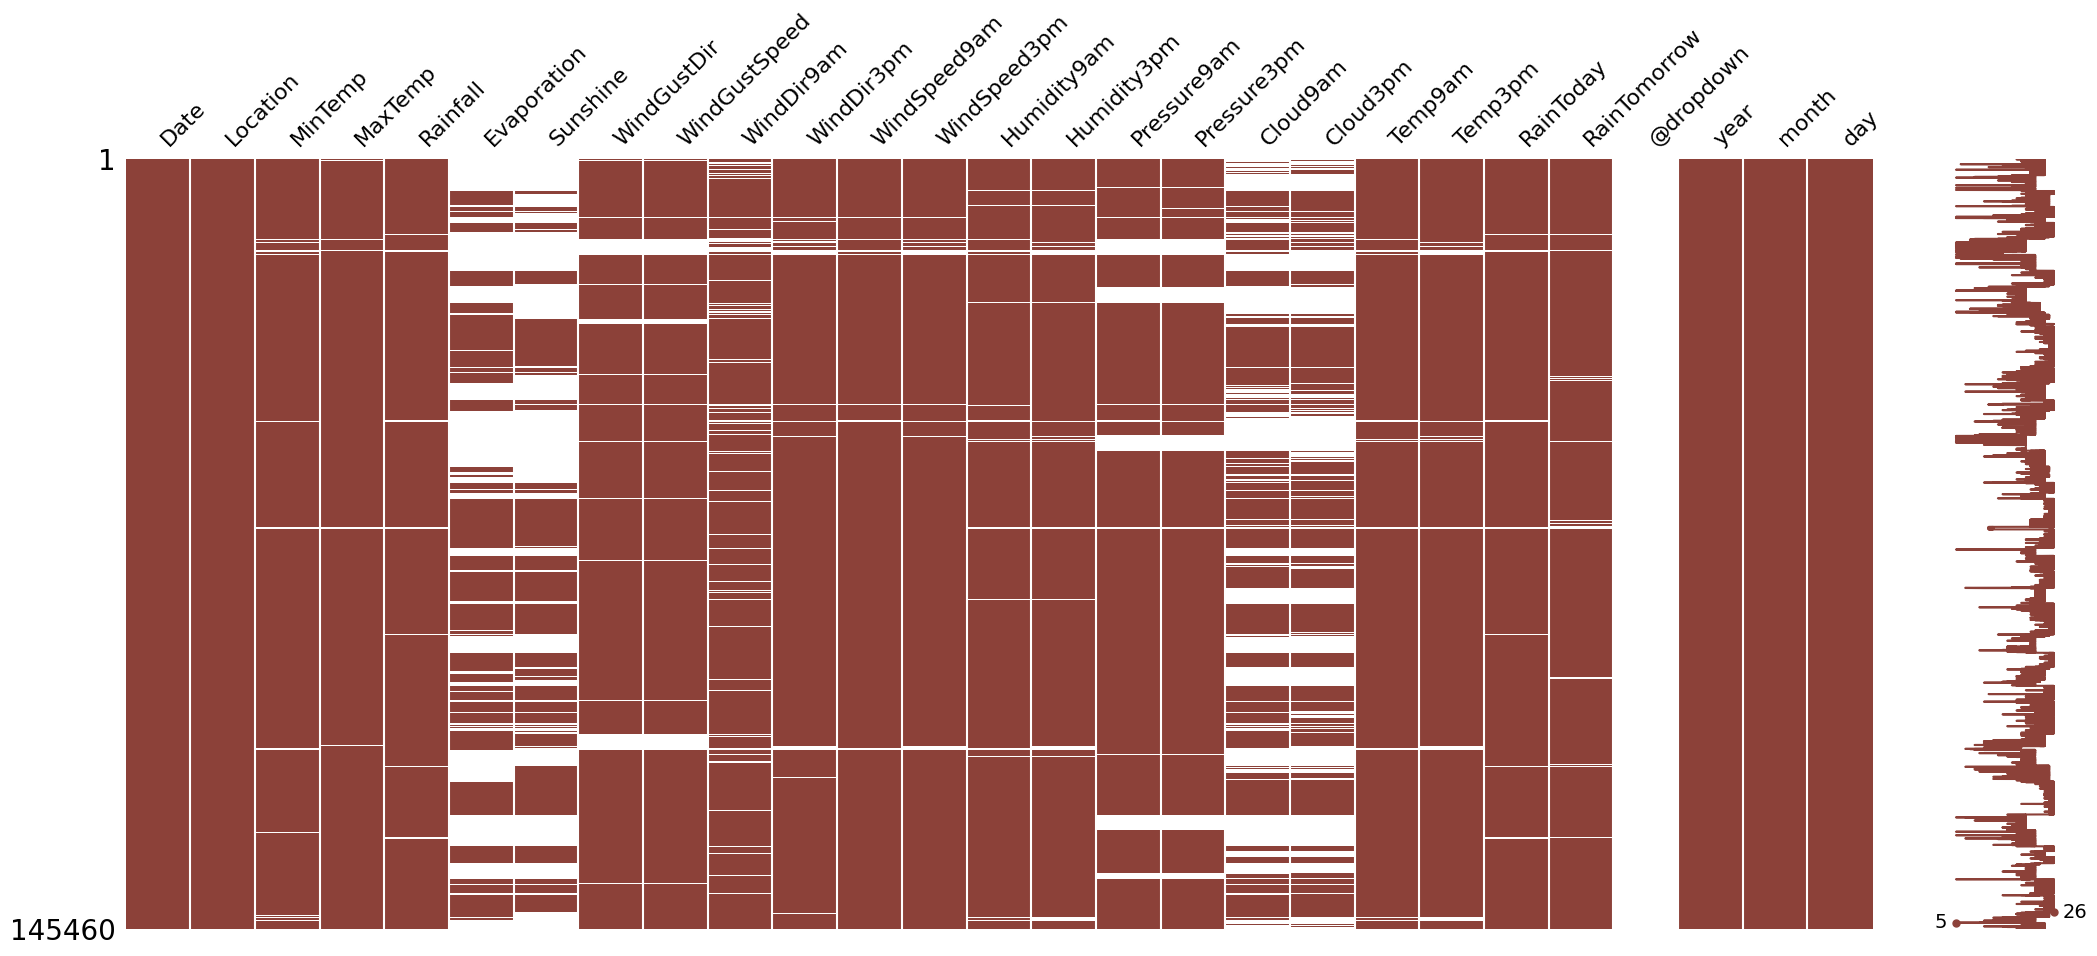

In [ ]:
import missingno as msno
msno.matrix(data,color=(0.55,0.255, 0.225), fontsize=16)

In [ ]:
# removing columns with more than 20% missing values and segregatting cat and num variables
data_cat=data[['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm' ]]
data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True, errors='ignore')
data.drop(columns=['RainToday', 'WindGustDir', 'WindDir9am' , 'WindDir3pm'], axis=1, inplace=True, errors='ignore')

In [ ]:
# filling the missing data of numeric variables with mean
data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(), inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(), inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(), inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(), inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(), inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(), inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(), inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(), inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(), inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(), inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(), inplace=True)

/tmp/ipython-input-1793559801.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)
/tmp/ipython-input-1793559801.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
cat_names = data_cat.columns

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
data_cat = imp_mode.fit_transform(data_cat)

In [ ]:
data_cat = pd.DataFrame(data_cat, columns=cat_names)

In [ ]:
data = pd.concat([data, data_cat], axis=1)

In [ ]:
num_data = data.select_dtypes(include=[np.number])
num_data.corr()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.733400  0.102706       0.172553      0.173404   
MaxTemp        0.733400  1.000000 -0.074040       0.065895      0.014294   
Rainfall       0.102706 -0.074040  1.000000       0.126446      0.085925   
WindGustSpeed  0.172553  0.065895  0.126446       1.000000      0.577319   
WindSpeed9am   0.173404  0.014294  0.085925       0.577319      1.000000   
WindSpeed3pm   0.173058  0.049717  0.056527       0.657243      0.512427   
Humidity9am   -0.230970 -0.497927  0.221380      -0.207964     -0.268271   
Humidity3pm    0.005995 -0.498760  0.248905      -0.025355     -0.030887   
Pressure9am   -0.423584 -0.308309 -0.159055      -0.425760     -0.215339   
Pressure3pm   -0.433147 -0.396622 -0.119541      -0.383938     -0.165388   
Temp9am        0.897692  0.879170  0.011069       0.145904      0.127592   
Temp3pm        0.699211  0.968713 -0.077684       0.031884      0.004476   
@dropdown           NaN       NaN       NaN            NaN           NaN   
year           0.042997  0.061720 -0.008868      -0.029264     -0.018306   
month         -0.202730 -0.163100 -0.031009       0.058778      0.050927   
day            0.002347  0.000609  0.001693      -0.008736     -0.008733   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.173058    -0.230970     0.005995    -0.423584   
MaxTemp            0.049717    -0.497927    -0.498760    -0.308309   
Rainfall           0.056527     0.221380     0.248905    -0.159055   
WindGustSpeed      0.657243    -0.207964    -0.025355    -0.425760   
WindSpeed9am       0.512427    -0.268271    -0.030887    -0.215339   
WindSpeed3pm       1.000000    -0.143458     0.016275    -0.277604   
Humidity9am       -0.143458     1.000000     0.659072     0.131503   
Humidity3pm        0.016275     0.659072     1.000000    -0.025848   
Pressure9am       -0.277604     0.131503    -0.025848     1.000000   
Pressure3pm       -0.239659     0.176009     0.048695     0.959662   
Temp9am            0.161060    -0.469641    -0.216964    -0.397131   
Temp3pm            0.027587    -0.490709    -0.555608    -0.265532   
@dropdown               NaN          NaN          NaN          NaN   
year              -0.029333     0.009757    -0.009463     0.028525   
month              0.059683    -0.089981    -0.018568     0.033035   
day               -0.009841     0.015028     0.012813    -0.020284   

               Pressure3pm   Temp9am   Temp3pm  @dropdown      year     month  \
MinTemp          -0.433147  0.897692  0.699211        NaN  0.042997 -0.202730   
MaxTemp          -0.396622  0.879170  0.968713        NaN  0.061720 -0.163100   
Rainfall         -0.119541  0.011069 -0.077684        NaN -0.008868 -0.031009   
WindGustSpeed    -0.383938  0.145904  0.031884        NaN -0.029264  0.058778   
WindSpeed9am     -0.165388  0.127592  0.004476        NaN -0.018306  0.050927   
WindSpeed3pm     -0.239659  0.161060  0.027587        NaN -0.029333  0.059683   
Humidity9am       0.176009 -0.469641 -0.490709        NaN  0.009757 -0.089981   
Humidity3pm       0.048695 -0.216964 -0.555608        NaN -0.009463 -0.018568   
Pressure9am       0.959662 -0.397131 -0.265532        NaN  0.028525  0.033035   
Pressure3pm       1.000000 -0.441459 -0.360707        NaN  0.023421  0.024227   
Temp9am          -0.441459  1.000000  0.846141        NaN  0.045654 -0.135286   
Temp3pm          -0.360707  0.846141  1.000000        NaN  0.050431 -0.172694   
@dropdown              NaN       NaN       NaN        NaN       NaN       NaN   
year              0.023421  0.045654  0.050431        NaN  1.000000 -0.112375   
month             0.024227 -0.135286 -0.172694        NaN -0.112375  1.000000   
day              -0.020616  0.000183 -0.000275        NaN -0.005042  0.009223   

                    day  
MinTemp        0.002347  
MaxTemp        0.000609  
Rainfall       0.001693  
WindGustSpeed -0.008736  
WindSpeed9am  -0.008733 

<Axes: >

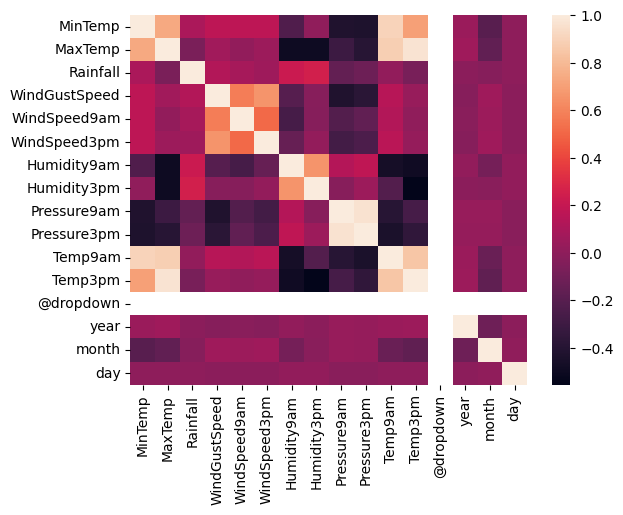

In [ ]:
cor = num_data.corr()
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

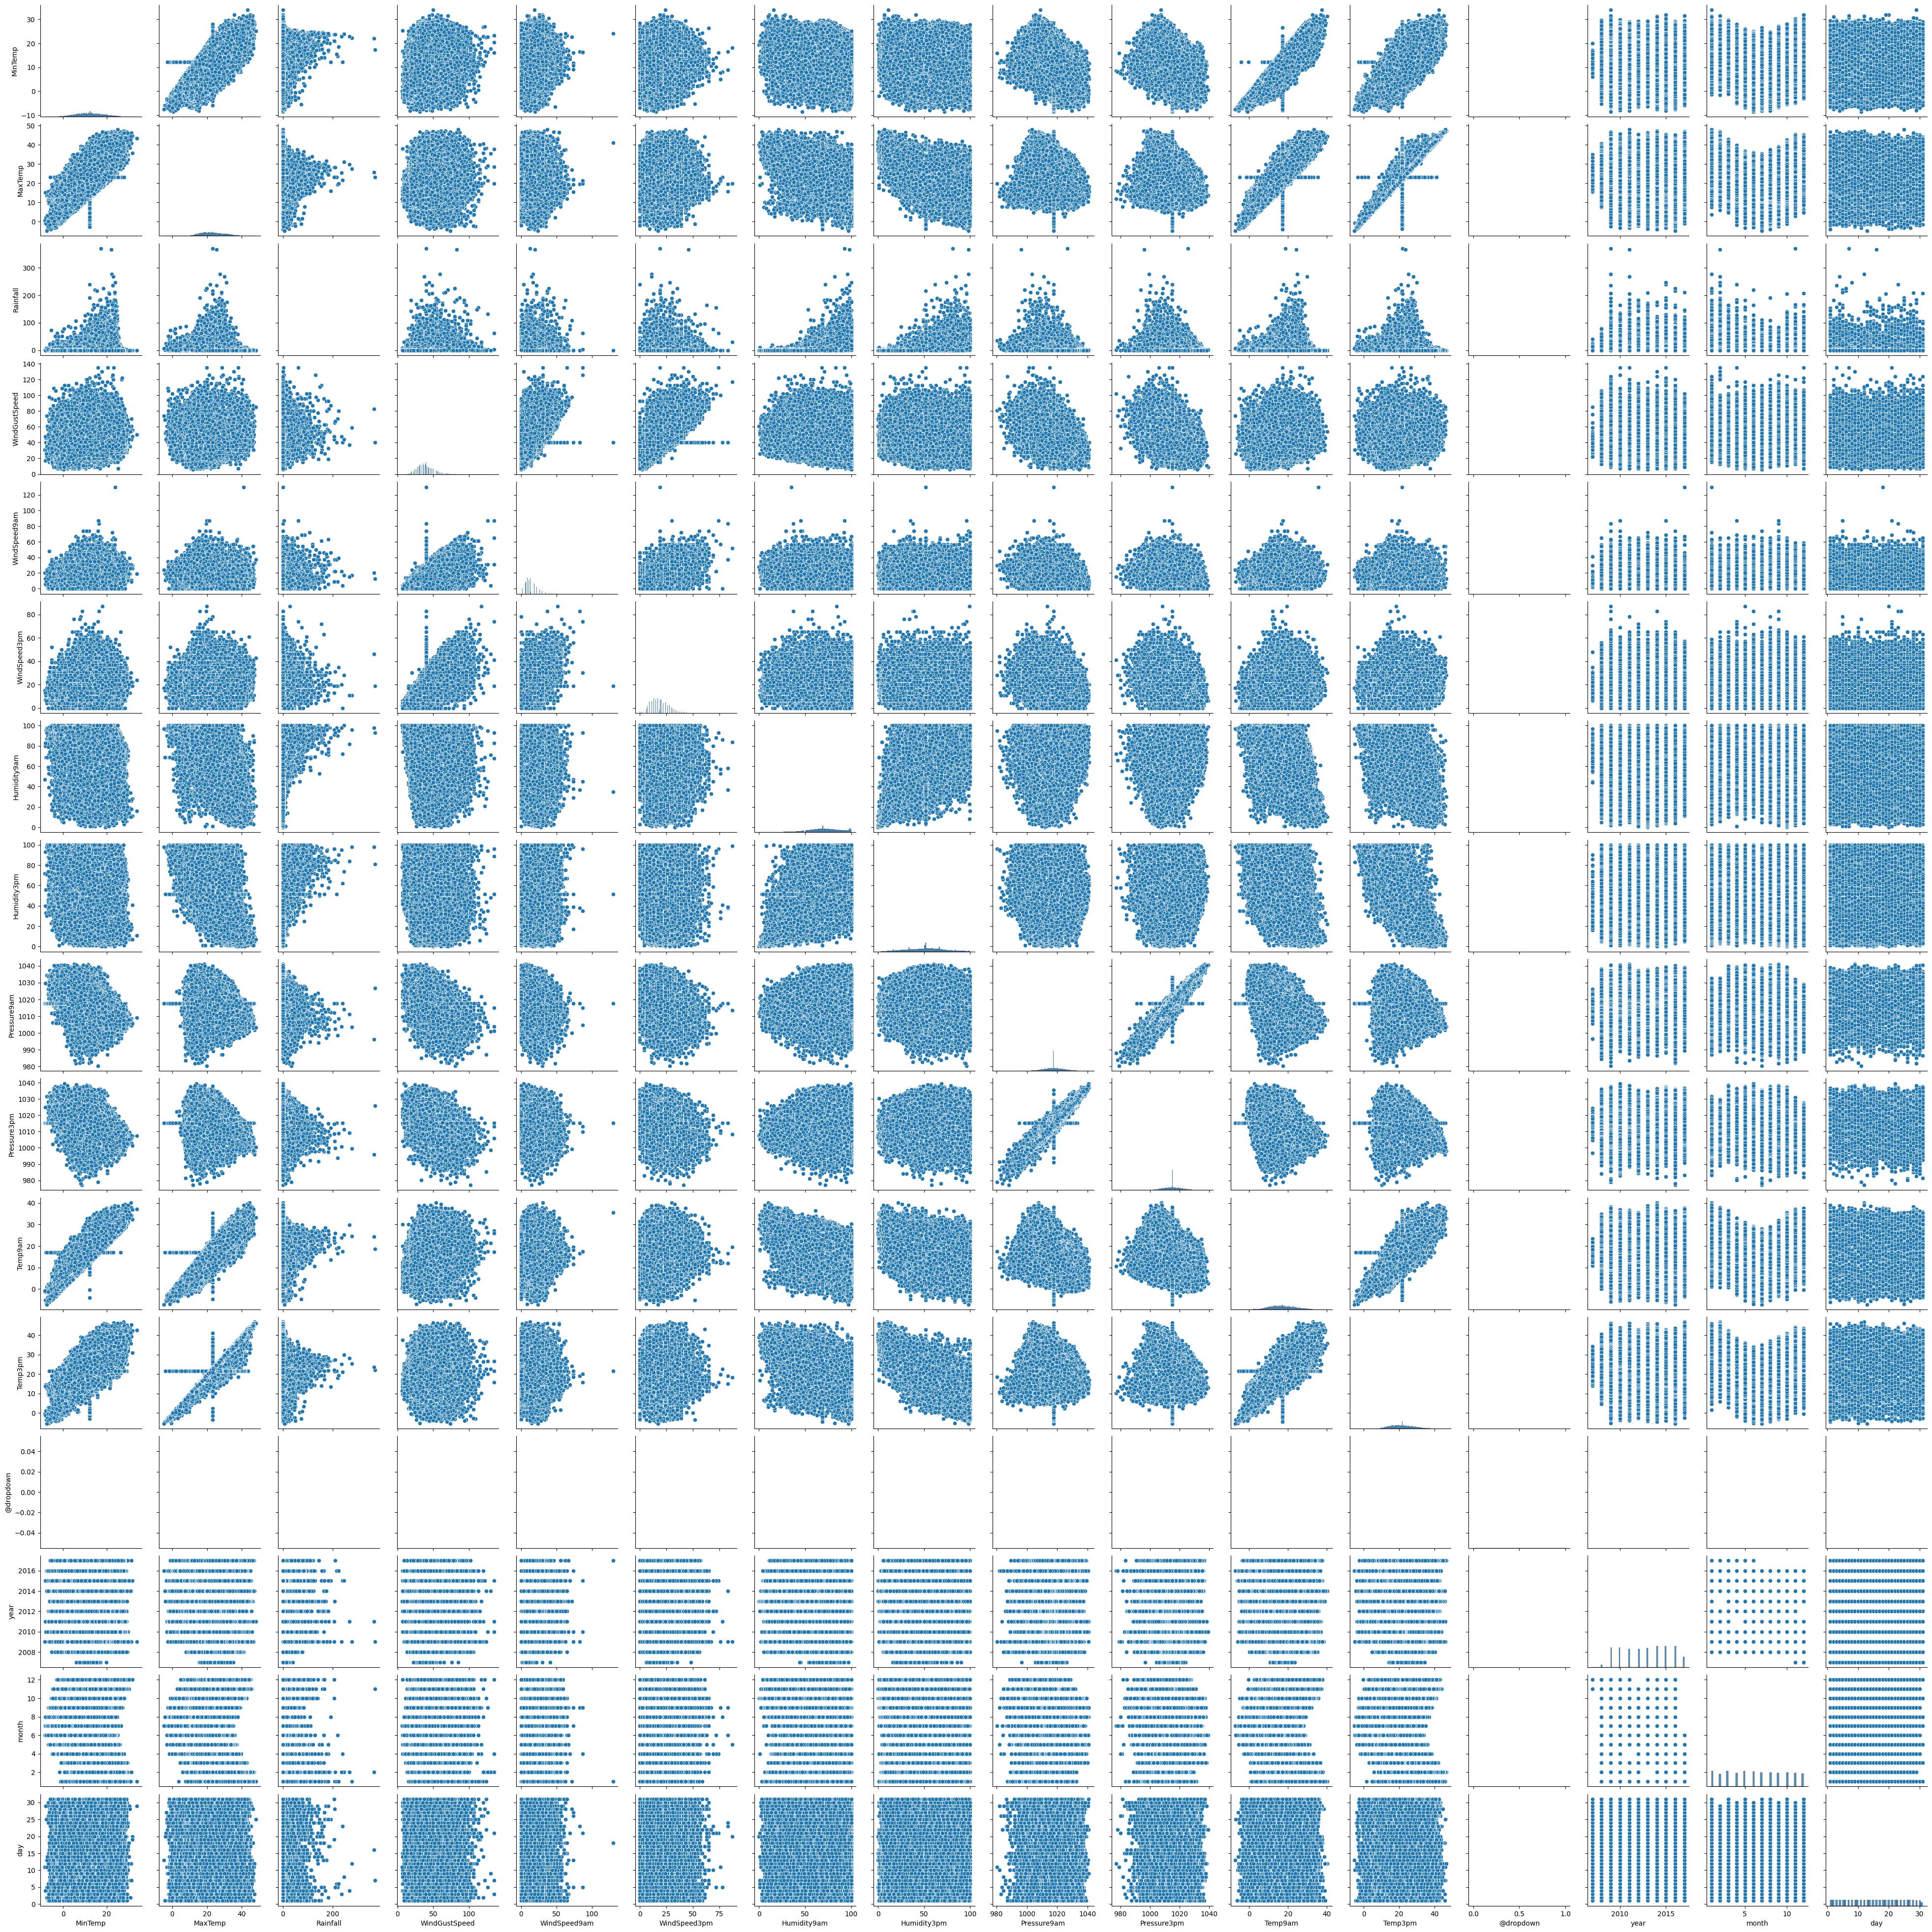

In [ ]:
sns.pairplot(data)

<Axes: >

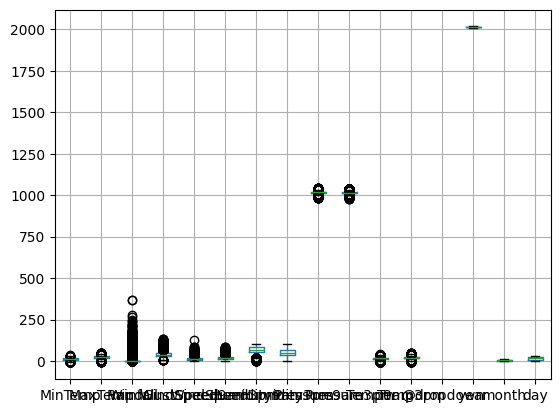

In [ ]:
data.boxplot()

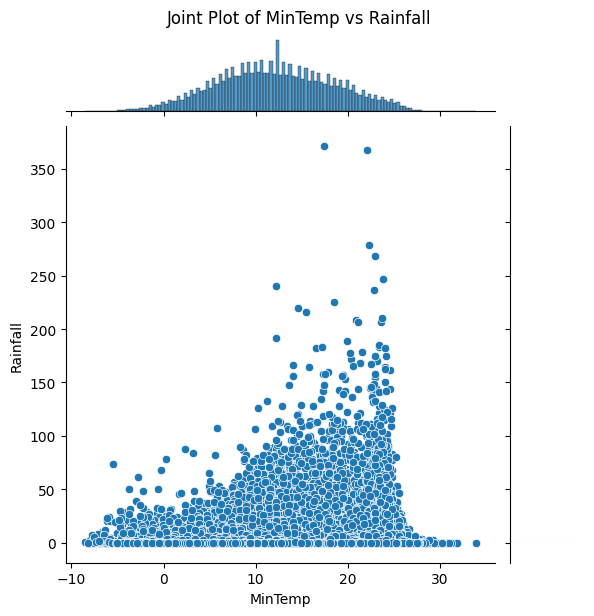

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Joint plot for MinTemp and Rainfall
sns.jointplot(x='MinTemp', y='Rainfall', data=data)
plt.suptitle('Joint Plot of MinTemp vs Rainfall', y=1.02) # Add a title
plt.show()

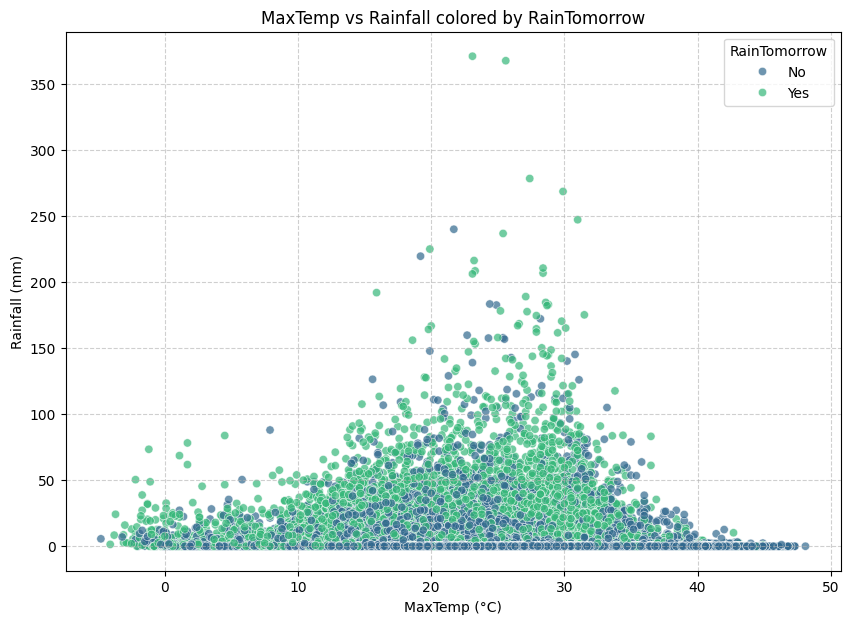

In [ ]:
# Scatter plot for MaxTemp vs Rainfall with RainTomorrow as hue
plt.figure(figsize=(10, 7))
sns.scatterplot(x='MaxTemp', y='Rainfall', hue='RainTomorrow', data=data, palette='viridis', alpha=0.7)
plt.title('MaxTemp vs Rainfall colored by RainTomorrow')
plt.xlabel('MaxTemp (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='RainTomorrow')
plt.show()

/tmp/ipython-input-1931944518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=data, palette='coolwarm')


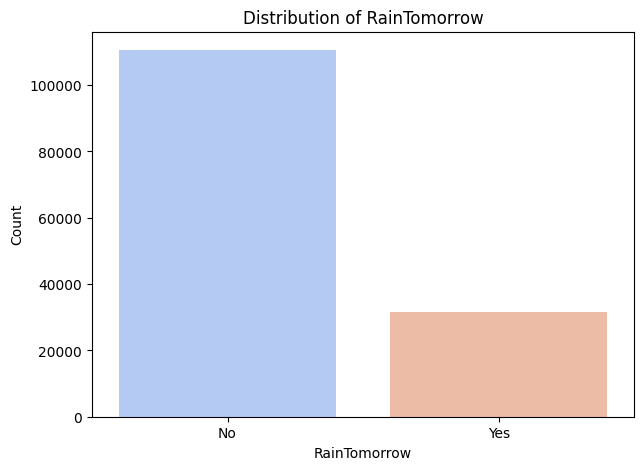

In [ ]:
# Histogram for RainTomorrow
plt.figure(figsize=(7, 5))
sns.countplot(x='RainTomorrow', data=data, palette='coolwarm')
plt.title('Distribution of RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.show()

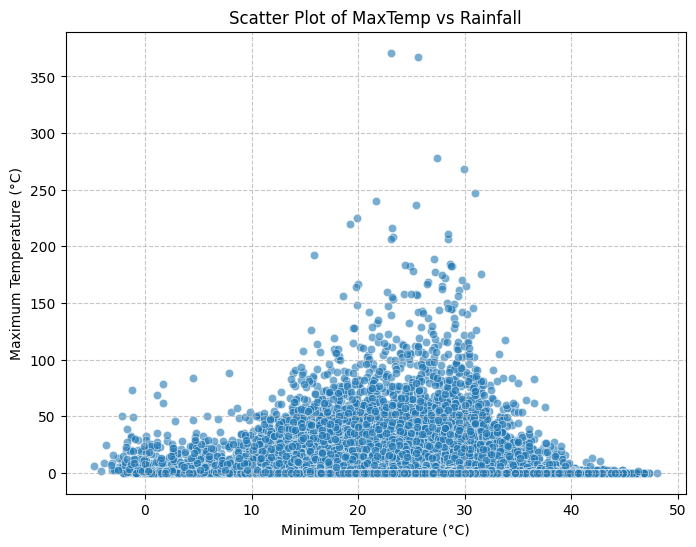

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxTemp', y='Rainfall', data=data, alpha=0.6)
plt.title('Scatter Plot of MaxTemp vs Rainfall')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Maximum Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<Figure size 800x600 with 0 Axes>

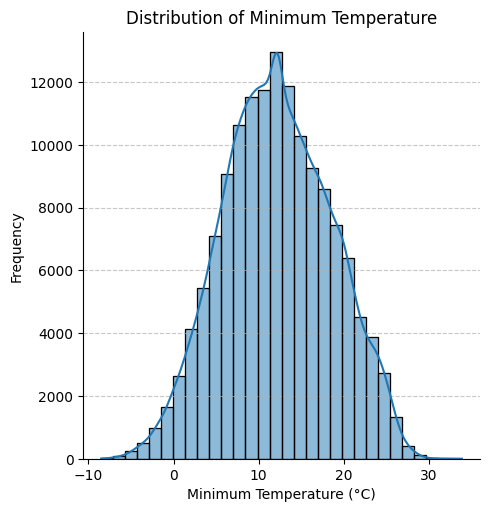

In [ ]:
plt.figure(figsize=(8, 6))
sns.displot(data['MinTemp'], kde=True, bins=30)
plt.title('Distribution of Minimum Temperature')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
y = data['RainTomorrow']

# Create a copy of the data for features (x) to avoid modifying the original 'data' DataFrame directly for this step
x = data.copy()

# Drop columns identified as having too many missing values or being irrelevant for features
x.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', '@dropdown', 'Date', 'RainTomorrow'], axis=1, inplace=True, errors='ignore')

# Handle NaN values in y (target variable) by filling with the most frequent value
y.fillna(y.mode()[0], inplace=True)

# Convert 'No'/'Yes' labels to numerical (0/1)
y = y.map({'No': 0, 'Yes': 1})

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
names = x.columns

In [ ]:
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'year', 'month',
       'day', 'RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [ ]:
sc = StandardScaler()

In [ ]:
# Separate numeric and categorical features from x
numeric_features = x.select_dtypes(include=np.number).columns.tolist()
categorical_features = x.select_dtypes(include='object').columns.tolist()

# Impute NaNs in numeric features with their mean using .loc for robustness
for col in numeric_features:
    if x[col].isnull().any():
        x.loc[:, col] = x[col].fillna(x[col].mean())

# Impute NaNs in categorical features with their mode using .loc for robustness
for col in categorical_features:
    if x[col].isnull().any():
        x.loc[:, col] = x[col].fillna(x[col].mode()[0])

# Apply StandardScaler to numeric features
x[numeric_features] = sc.fit_transform(x[numeric_features])

# Apply one-hot encoding to categorical features
x = pd.get_dummies(x, columns=categorical_features, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost
from sklearn.svm import LinearSVC

XGBoost = xgboost.XGBRFClassifier()
Rand_forest = ensemble.RandomForestClassifier()
svm = LinearSVC(max_iter=10000) # Changed from SVC to LinearSVC for faster execution
Dtree = tree.DecisionTreeClassifier()
GBM = ensemble.GradientBoostingClassifier()
log = linear_model.LogisticRegression()

In [ ]:
svm.fit(x_train, y_train)

LinearSVC(max_iter=10000)

In [ ]:
XGBoost.fit(x_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [ ]:
Rand_forest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
Dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
GBM.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
log.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# predicting the train values
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
p3 = svm.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)

In [ ]:
#checking the accuraccy score
print("xgboost:", metrics.accuracy_score(y_train,p1))
print("Rand_forest:", metrics. accuracy_score(y_train,p2))
print("svm:", metrics. accuracy_score(y_train, p3))
print("Dtree:", metrics.accuracy_score(y_train,p4))
print("GBM:",metrics.accuracy_score(y_train,p5))
print("log:", metrics.accuracy_score(y_train,p6))

xgboost: 0.8461690499106284
Rand_forest: 0.9999656262890142
svm: 0.8460057747834456
Dtree: 1.0
GBM: 0.8514196342637151
log: 0.8468651175580916


In [ ]:
t1 = XGBoost.predict(x_test)
t2 = Rand_forest.predict(x_test)
t3 = svm.predict(x_test)
t4 = Dtree.predict(x_test)
t5 = GBM.predict(x_test)
t6 = log.predict(x_test)

In [ ]:
print("xgboost:", metrics.accuracy_score(y_test, t1))
print("Rand_forest:", metrics. accuracy_score(y_test, t2))
print("svm: ", metrics.accuracy_score(y_test,t3))
print("Dtree:", metrics.accuracy_score(y_test, t4))
print("GBM:", metrics.accuracy_score(y_test,t5))
print("log:", metrics.accuracy_score(y_test,t6))

xgboost: 0.8387529217654338
Rand_forest: 0.8503024886566753
svm:  0.8447683211879554
Dtree: 0.7883266877492094
GBM: 0.8466932490031623
log: 0.8450433108758422


In [ ]:
# Select the best model (RandomForestClassifier)
best_model = Rand_forest

# Generate predictions for training data
y_train_pred_best = best_model.predict(x_train)

# Generate predictions for testing data
y_test_pred_best = best_model.predict(x_test)

# Calculate and print accuracy for training data
train_accuracy_best = metrics.accuracy_score(y_train, y_train_pred_best)
print(f"Random Forest Training Accuracy: {train_accuracy_best:.4f}")

# Calculate and print accuracy for testing data
test_accuracy_best = metrics.accuracy_score(y_test, y_test_pred_best)
print(f"Random Forest Testing Accuracy: {test_accuracy_best:.4f}")

Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy: 0.8503


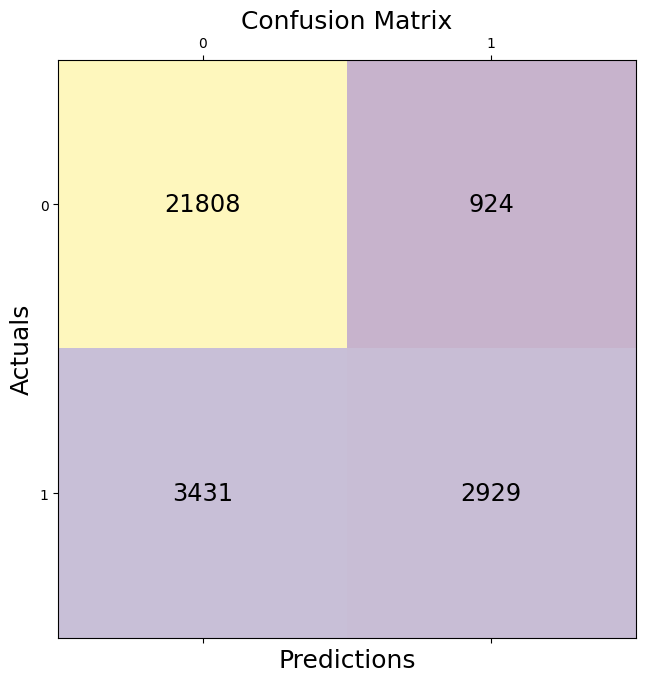

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred_best)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn import metrics

# Assuming y_test and y_test_pred_best are already defined

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print Accuracy
Accuracy = metrics.accuracy_score(y_test, y_test_pred_best)
print(f"Accuracy: {Accuracy:.4f}")

# Calculate and print Precision
# For binary classification, specify pos_label if 'Yes' is the positive class, otherwise it defaults to 1
Precision = metrics.precision_score(y_test, y_test_pred_best, pos_label=1)
print(f"Precision: {Precision:.4f}")

# Calculate and print Recall
Recall = metrics.recall_score(y_test, y_test_pred_best, pos_label=1)
print(f"Recall: {Recall:.4f}")

# Calculate and print F1-score
F1_score = metrics.f1_score(y_test, y_test_pred_best, pos_label=1)
print(f"F1-score: {F1_score:.4f}")

Confusion Matrix:
[[21808   924]
 [ 3431  2929]]
Accuracy: 0.8503
Precision: 0.7602
Recall: 0.4605
F1-score: 0.5736


### AUC & ROC Curve for the Best Model

To further evaluate the performance of the `RandomForestClassifier`, particularly its ability to distinguish between classes, let's plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC). A higher AUC value indicates better model performance.

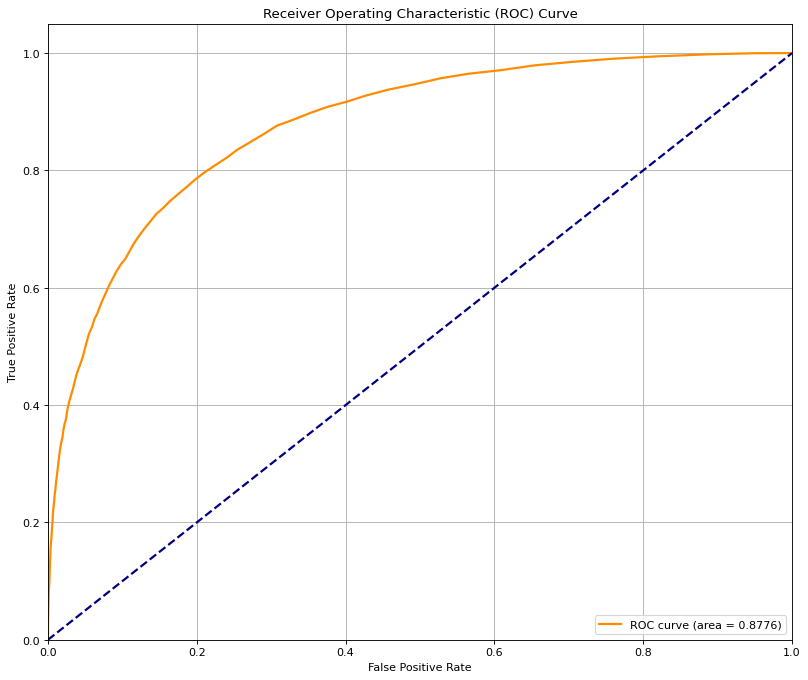

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Get probability predictions for the positive class (class 1)
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

# Calculate AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Calculate False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(12, 10), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
import pickle

pickle.dump(best_model, open('rainfall.pkl', 'wb'))
pickle.dump(imp_mode, open('impter.pkl','wb'))
pickle.dump(sc, open('scale.pkl','wb'))

# Task
Create a LabelEncoder instance, fit it to the 'No' and 'Yes' categories of the `RainTomorrow` target variable, and save this fitted encoder as "encoder.pkl". Confirm that "encoder.pkl" has been successfully created and saved.

## Create and Save LabelEncoder for Target

### Subtask:
Create a LabelEncoder instance, fit it to the 'No' and 'Yes' categories of the `RainTomorrow` target variable, and save this fitted encoder as "encoder.pkl".


**Reasoning**:
To encode the target variable 'RainTomorrow' consistently, I will import the `LabelEncoder`, create an instance, fit it to the known categories 'No' and 'Yes', and then save the fitted encoder for future use.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder to the unique string categories of the RainTomorrow variable
# The order of 'No' and 'Yes' matters for consistent encoding (e.g., 'No' as 0, 'Yes' as 1)
label_encoder.fit(['No', 'Yes'])

# Save the fitted LabelEncoder object to a file named 'encoder.pkl'
import pickle
pickle.dump(label_encoder, open('encoder.pkl', 'wb'))

print("LabelEncoder created, fitted to ['No', 'Yes'], and saved as 'encoder.pkl'.")

LabelEncoder created, fitted to ['No', 'Yes'], and saved as 'encoder.pkl'.


## Final Task

### Subtask:
Confirm that the `encoder.pkl` file has been successfully created and saved, ready for use in future inference or inverse transformations of the target variable.


## Summary:

### Data Analysis Key Findings

*   A `LabelEncoder` instance was successfully created and fitted to the unique categories 'No' and 'Yes' of the `RainTomorrow` target variable.
*   The fitted `LabelEncoder` object was successfully saved to a file named `encoder.pkl`, confirming its readiness for future use.

### Insights or Next Steps

*   The `encoder.pkl` file is now ready to be used for consistently encoding the `RainTomorrow` target variable, mapping 'No' to 0 and 'Yes' to 1.
*   This saved encoder can be loaded in subsequent steps for both encoding the target variable for model training and for inverse transforming predictions back to their original 'No'/'Yes' format.
